About Dataset
This comprehensive dataset offers an in-depth look into domestic flight operations in India, sourced from Goibibo. It includes a diverse range of flight information such as airlines, flight numbers, travel classes, departure and arrival cities, timings, durations, prices, and the number of stops. The data is meticulously organized to provide insights into airfare trends, travel durations, route preferences, and seasonal patterns, making it an invaluable resource for aviation analysis, travel planning, and market research

About this file

Add Suggestion
File Information
The dataset includes a single file:

goibibo_flights_data.csv :
Description: This file contains detailed information about domestic flights in India for the period of July to August 2023.
Columns:
flight_date: The date of the flight in YYYY-MM-DD format.
airline: Name of the airline operating the flight.
flight_num: The flight number.
class: Travel class (e.g., economy, business).
from: Departure city.
dep_time: Scheduled departure time.
to: Arrival city.
arr_time: Scheduled arrival time.
duration: Total duration of the flight in hours and minutes.
price: Ticket price in Indian Rupees (INR).
stops: Number of stops (e.g., non-stop, 1-stop).
The dataset is structured to facilitate analysis of flight durations, prices, and other travel patterns, making it suitable for research and exploration of the Indian domestic aviation market.

In [35]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [36]:
data=pd.read_csv(r"C:\Users\Shreyas\Downloads\goibibo_flights_data.csv",)

In [37]:
data

,flight date,airline,flight_num,class,from,dep_time,to,arr_time,duration,price,stops,Unnamed: 11,Unnamed: 12
0,26-06-2023,SpiceJet,SG-8709,economy,Delhi,18:55,Mumbai,21:05,02h 10m,"6,013",non-stop,NaN,NaN
1,26-06-2023,SpiceJet,SG-8157,economy,Delhi,06:20,Mumbai,08:40,02h 20m,"6,013",non-stop,NaN,NaN
2,26-06-2023,AirAsia,I5-764,economy,Delhi,04:25,Mumbai,06:35,02h 10m,"6,016",non-stop,NaN,NaN
3,26-06-2023,Vistara,UK-995,economy,Delhi,10:20,Mumbai,12:35,02h 15m,"6,015",non-stop,NaN,NaN
4,26-06-2023,Vistara,UK-963,economy,Delhi,08:50,Mumbai,11:10,02h 20m,"6,015",non-stop,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
300256,13-08-2023,Vistara,UK-822,business,Chennai,09:45,Hyderabad,19:50,10h 05m,"70,304",1-stop,NaN,NaN
300257,13-08-2023,Vistara,UK-826,business,Chennai,12:30,Hyderabad,22:55,10h 25m,"78,262",1-stop,NaN,NaN
300258,13-08-2023,Vistara,UK-832,business,Chennai,07:05,Hyderabad,20:55,13h 50m,"80,285",1-stop,NaN,NaN
300259,13-08-2023,Vistara,UK-828,business,Chennai,07:00,Hyderabad,17:00,10h 00m,"82,809",1-stop,NaN,NaN


In [38]:
data.shape

(300261, 13)

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300261 entries, 0 to 300260
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   flight date  300261 non-null  object 
 1   airline      300261 non-null  object 
 2   flight_num   300261 non-null  object 
 3   class        300261 non-null  object 
 4   from         300261 non-null  object 
 5   dep_time     300261 non-null  object 
 6   to           300261 non-null  object 
 7   arr_time     300261 non-null  object 
 8   duration     300261 non-null  object 
 9   price        300261 non-null  object 
 10  stops        300261 non-null  object 
 11  Unnamed: 11  0 non-null       float64
 12  Unnamed: 12  0 non-null       float64
dtypes: float64(2), object(11)
memory usage: 29.8+ MB


In [40]:
data.dtypes

flight date     object
airline         object
flight_num      object
class           object
from            object
dep_time        object
to              object
arr_time        object
duration        object
price           object
stops           object
Unnamed: 11    float64
Unnamed: 12    float64
dtype: object

In [41]:
data.describe()

,Unnamed: 11,Unnamed: 12
count,0.0,0.0
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,NaN,NaN


In [42]:
data.describe(include='object')

,flight date,airline,flight_num,class,from,dep_time,to,arr_time,duration,price,stops
count,300261,300261,300261,300261,300261,300261,300261,300261,300261,300261,300261
unique,49,8,1569,2,6,251,6,266,483,12170,40
top,20-07-2023,Vistara,UK-706,economy,Delhi,07:00,Mumbai,19:55,02h 10m,"55,427",1-stop
freq,6633,127859,3235,206774,61345,8760,59109,9194,4242,1445,243603


# Removing unwanted columns 

In [43]:
data.drop(['Unnamed: 11', 'Unnamed: 12'], axis=1, inplace=True)

# Price there were unwanted space to deal with it we used str and converted its datatype to float

In [44]:
data['price'] = data['price'].str.replace(',', '').astype(float)

# Converting to date and time 

In [45]:
data['flight date'] = pd.to_datetime(data['flight date'], format='%d-%m-%Y')

In [46]:
data.isnull().sum()

flight date    0
airline        0
flight_num     0
class          0
from           0
dep_time       0
to             0
arr_time       0
duration       0
price          0
stops          0
dtype: int64

# Checking Duplicate values in our data 

In [47]:
print('Number of duplicates:',data.duplicated().sum())

Number of duplicates: 2


In [48]:
d=data.drop_duplicates(inplace=True)

# Function to count the number of distinct observations over the index or column axis.

In [49]:
data.nunique()

flight date       49
airline            8
flight_num      1569
class              2
from               6
dep_time         251
to                 6
arr_time         266
duration         483
price          12170
stops             40
dtype: int64

# EDA (Exploratory Data Analysis)

# Top Airlines Perfromance`

In [50]:
airline_count = data['airline'].value_counts().reset_index()
airline_count

,airline,count
0,Vistara,127859
1,Air India,80892
2,Indigo,43120
3,GO FIRST,23177
4,AirAsia,16098
5,SpiceJet,9011
6,StarAir,61
7,Trujet,41


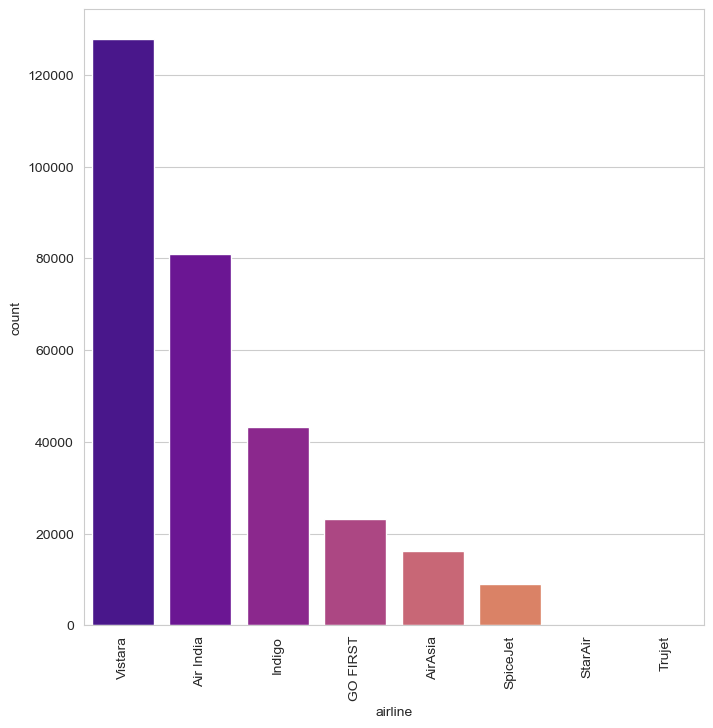

In [51]:
plt.figure(figsize=(8, 8))
sns.barplot(x="airline",y="count",data=airline_count,ci=0,estimator=np.median,palette='plasma')
plt.xticks(rotation=90);

# Most Seat booked by Customers

In [52]:
class_count = data['class'].value_counts().reset_index()
class_count

class_count.columns = ['class', 'count']  


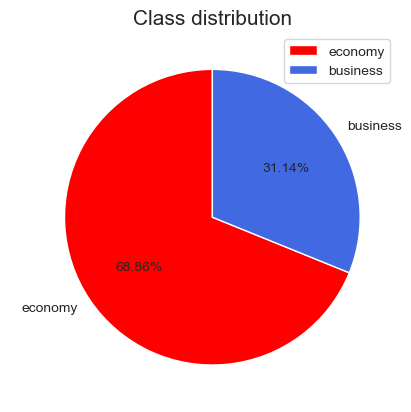

In [53]:
#plt.figure(figsize = (20, 10))
data['class'].value_counts().plot.pie(startangle=90,autopct="%.2f%%",colors=["red","royalblue"])
plt.title("Class distribution", fontsize=15);
plt.ylabel(" ")
plt.legend(loc="upper right");

# Takeoff Terrains: Departure Stations

In [54]:
from_count = data['from'].value_counts().reset_index()
from_count

,from,count
0,Delhi,61343
1,Mumbai,60903
2,Bangalore,52106
3,Kolkata,46347
4,Hyderabad,40860
5,Chennai,38700


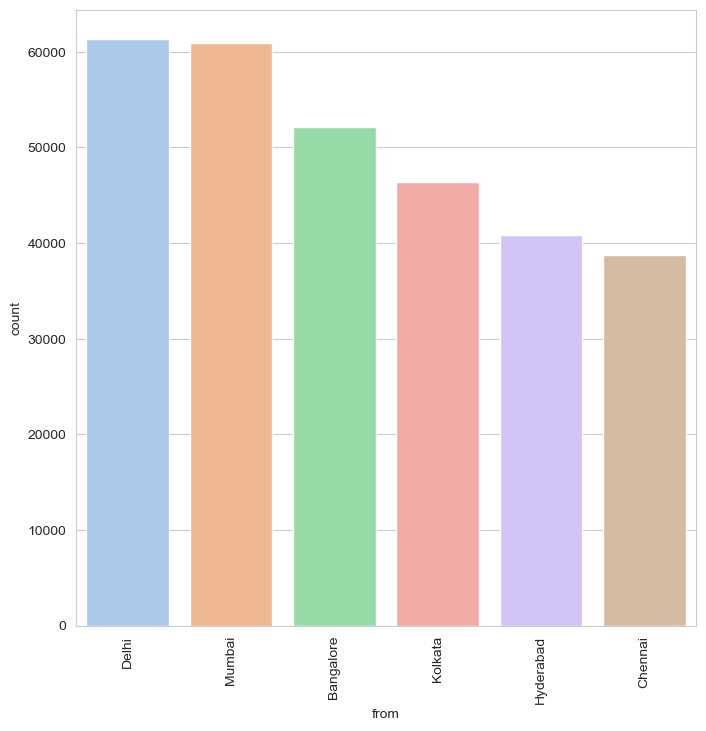

In [55]:
plt.figure(figsize=(8, 8))
sns.barplot(x="from",y="count",data=from_count,ci=0,estimator=np.median,palette='pastel')
plt.xticks(rotation=90);

# Landing Zones: Arrival Stations

In [56]:
to_count = data['to'].value_counts().reset_index()
to_count

,to,count
0,Mumbai,59107
1,Delhi,57361
2,Bangalore,51112
3,Kolkata,49535
4,Hyderabad,42776
5,Chennai,40368


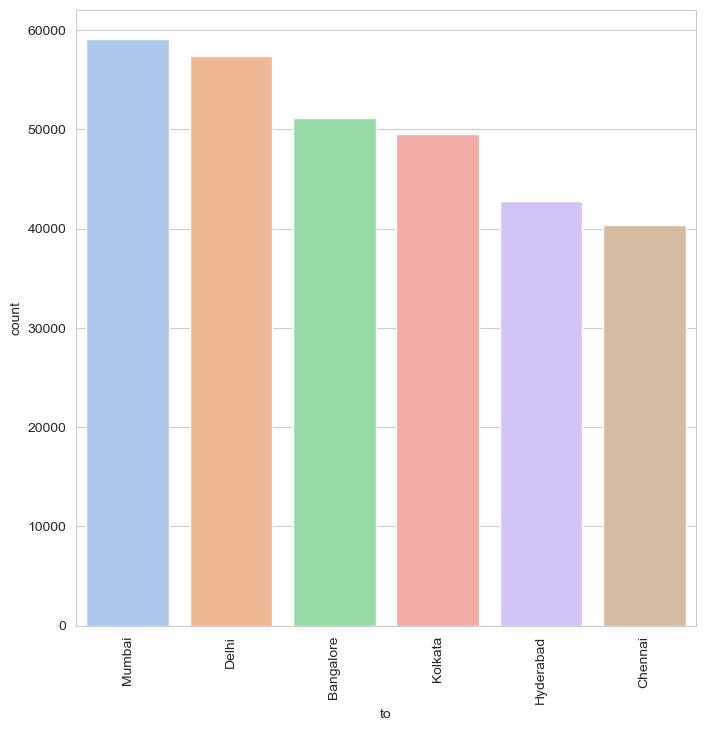

In [57]:
plt.figure(figsize=(8, 8))
sns.barplot(x="to",y="count",data=to_count,ci=0,estimator=np.median,palette='pastel')

plt.xticks(rotation=90);

# Stop or Not?: Stops Analysis

In [58]:
stop_count = data['stops'].value_counts().reset_index()
stop_count

,stops,count
0,1-stop,243601
1,non-stop,36044
2,2+-stop,13288
3,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXU\n\t\t\...,1839
4,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IDR\n\t\t\...,1398
5,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Patna\n\t\...,674
6,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Indore\n\t...,381
7,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia PAT\n\t\t\...,354
8,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia MYQ\n\t\t\...,321
9,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Bhubaneswa...,301


The clean_stops function standardizes the values in the stops column of the DataFrame by:
Normalizing Text: It removes leading/trailing whitespace and converts text to lowercase to ensure consistency.
Standardizing Categories: It replaces variations of stop counts (e.g., "non-stop," "1-stop," "2-stop") with uniform labels ("Non-stop," "1 Stop," "2 Stops").
Data Consistency: This cleaning process makes the data easier to analyze and compare, improving overall data quality.
Applying it with data['stops'].apply(clean_stops) ensures uniformity in the stops column.

In [59]:
def clean_stops(stops):
    stops = stops.strip().lower()  
    if 'non-stop' in stops:
        return 'Non-stop'
    elif '1-stop' in stops or '1 stop' in stops:
        return '1 Stop'
    elif '2-stop' in stops or '2 stop' in stops:
        return '2 Stops'
    return stops

data['stops'] = data['stops'].apply(clean_stops)


In [60]:
stop_counts = data['stops'].value_counts().reset_index()
stop_counts

,stops,count
0,1 Stop,250927
1,Non-stop,36044
2,2+-stop,13288


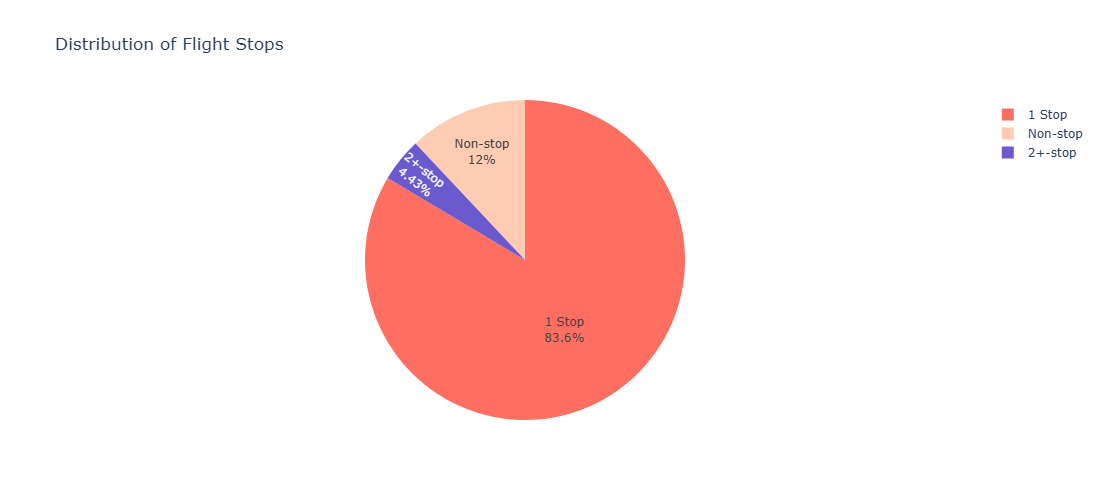

In [61]:
best_colors = ['#FF6F61', '#FFCCB3', '#6A5ACD']
fig = px.pie(stop_counts, 
             values='count', 
             names='stops', 
             title='Distribution of Flight Stops',
             color_discrete_sequence=best_colors)  # Use the best colors
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(showlegend=True, height=500, width=500)
fig.show()


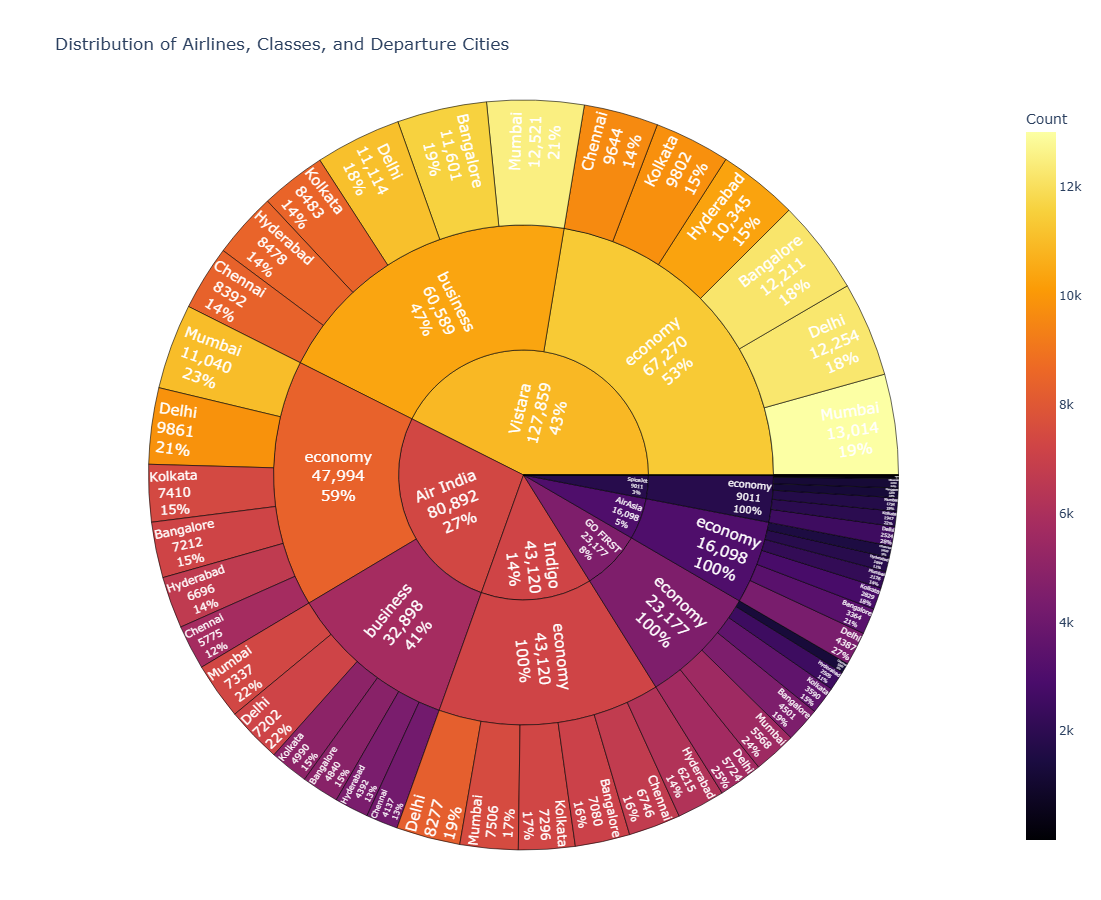

In [62]:
# Prepare data for sunburst
status_counts = data.groupby(['airline', 'class', 'from']).size().reset_index(name='Count')

# Create a sunburst chart with enhanced colors
fig = px.sunburst(
    status_counts,
    path=['airline', 'class', 'from'],  # Hierarchy: airline > class > from
    values='Count',  # Values to size the segments
    color='Count',  # Apply color based on 'Count' values
    color_continuous_scale='inferno',  # Choose a vibrant color scale
    title='Distribution of Airlines, Classes, and Departure Cities',
    hover_data={'airline': True, 'class': True, 'from': True, 'Count': True}  # Show additional info on hovering 
)

# Update layout for improved readability and visibility
fig.update_traces(
    textinfo='label+value+percent parent',  # Displays label, value, and parent percentage
    insidetextorientation='radial',  # this  Ensures text fits well inside smaller segments
    marker=dict(line=dict(color='black', width=0.6)),  # Add a thin border for segment clarity
    textfont=dict(size=15, color='white')  # Smaller, contrasting font for readability
)

# Adjust layout dimensions and margins for better visibility
fig.update_layout(
    legend_title_text='Airlines, Classes, and Departure Cities',  #  this Customize legend title
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="center", x=0.5),  #  to adjust Centered horizontal legend
    width=800,  # Increase width
    height=900,  # Increase height
    margin=dict(t=100, l=50, r=50, b=50)  # Balanced margins
)

# Show the figure
fig.show()

# Price Pop: Price Analysis

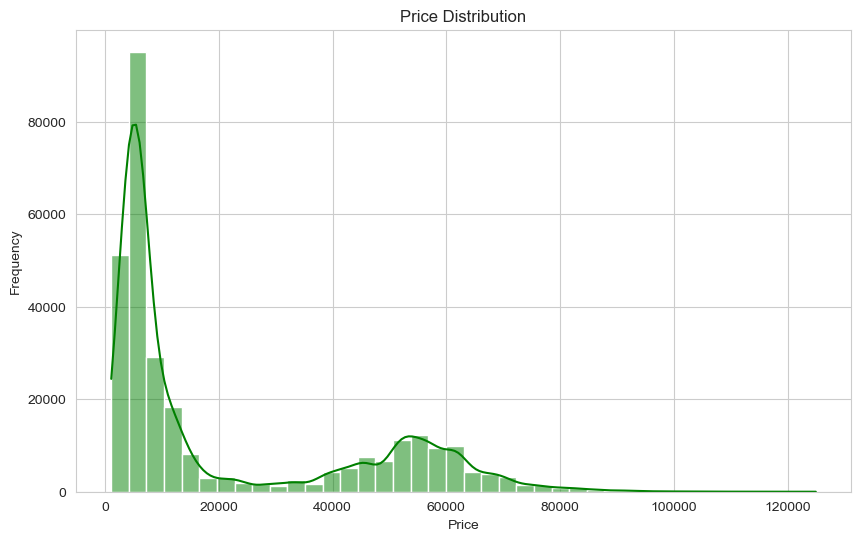

In [63]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=40, kde=True, color="green")
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [64]:
print("Average of Price:",data['price'].mean().round(2))

Average of Price: 21174.45


# Airline Aces: Average Price by Airline

In [66]:
price_by_class = data.groupby('class')['price'].mean().reset_index().round(2)
price_by_class

,class,price
0,business,53328.19
1,economy,6636.90


In [68]:
price_by_airline = data.groupby('airline')['price'].mean().reset_index().round(2)
price_by_airline

,airline,price
0,Air India,23837.94
1,AirAsia,4132.03
2,GO FIRST,5708.46
3,Indigo,5377.49
4,SpiceJet,6241.05
5,StarAir,4982.02
6,Trujet,3277.10
7,Vistara,30831.96


In [69]:
price_by_stops =  data.groupby('stops')['price'].mean().reset_index().round(2)
price_by_stops 

,stops,price
0,1 Stop,23217.35
1,2+-stop,14281.73
2,Non-stop,9493.46


In [70]:
price_by_from =  data.groupby('from')['price'].mean().reset_index().round(2)
price_by_from 

,from,price
0,Bangalore,21755.22
1,Chennai,22302.95
2,Delhi,19213.56
3,Hyderabad,20413.96
4,Kolkata,22046.03
5,Mumbai,21782.47


In [71]:
price_by_to =  data.groupby('to')['price'].mean().reset_index().round(2)
price_by_to 

,to,price
0,Bangalore,21879.21
1,Chennai,22260.24
2,Delhi,18690.93
3,Hyderabad,20694.84
4,Kolkata,22263.37
5,Mumbai,21668.13


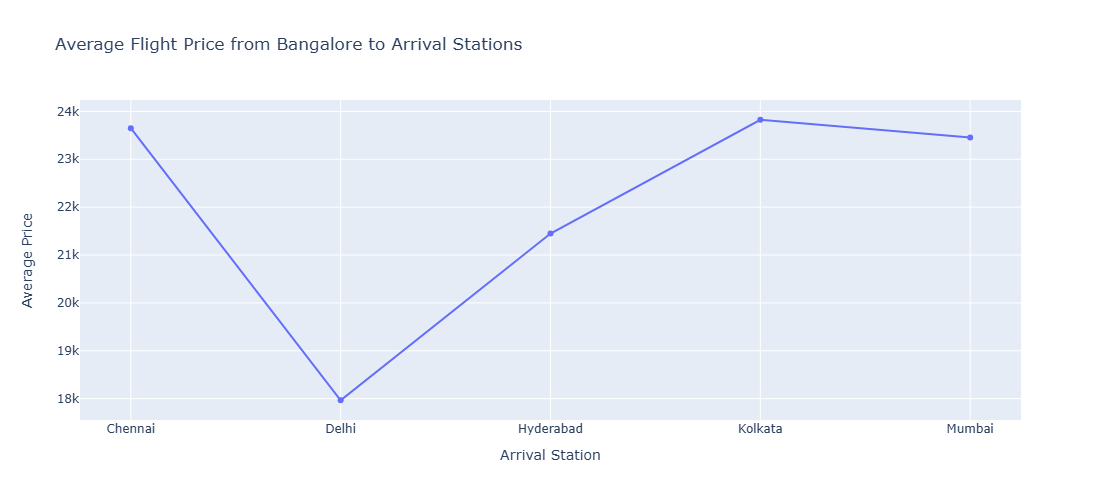

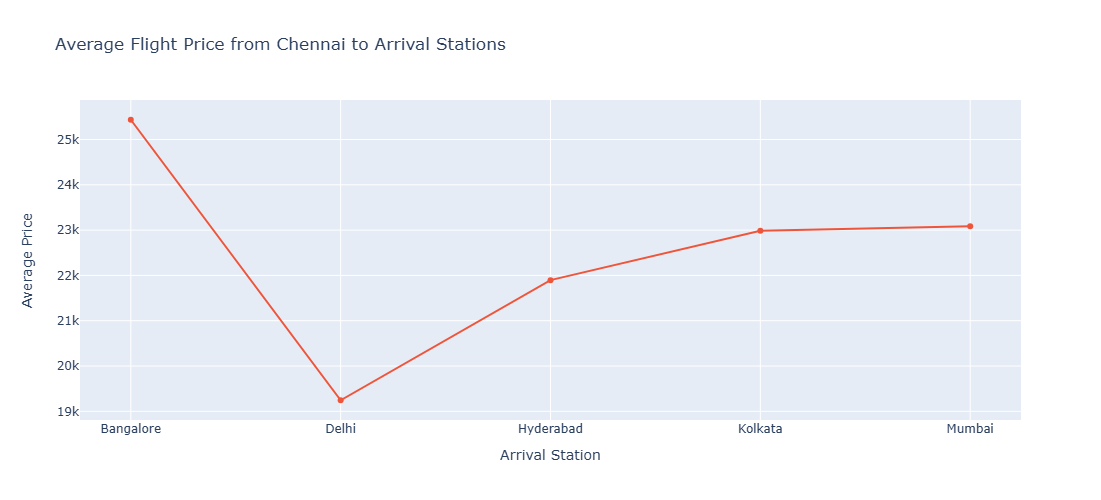

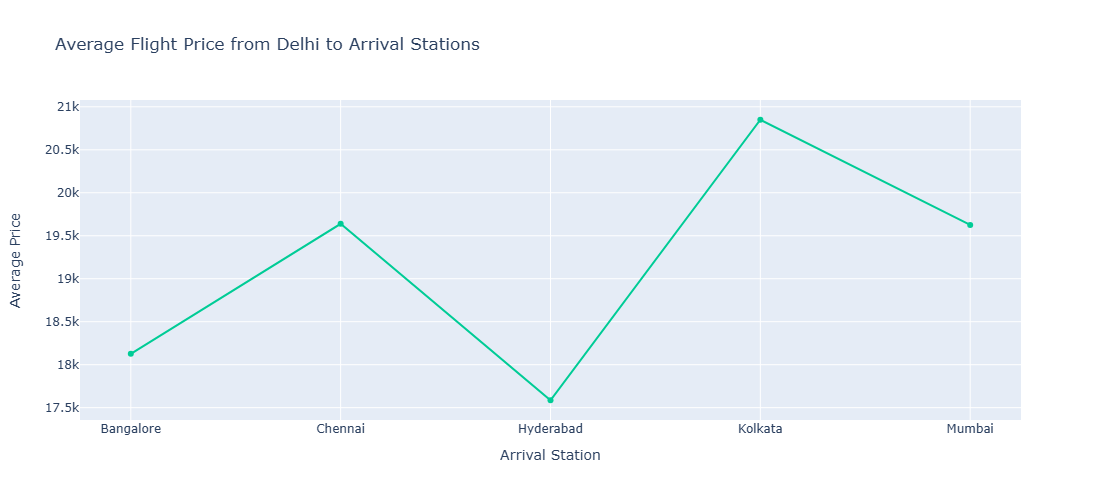

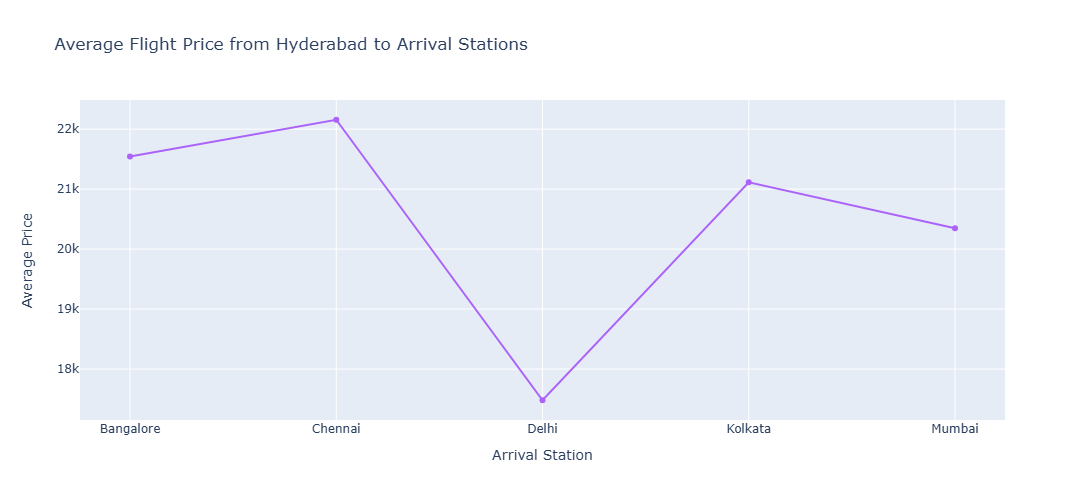

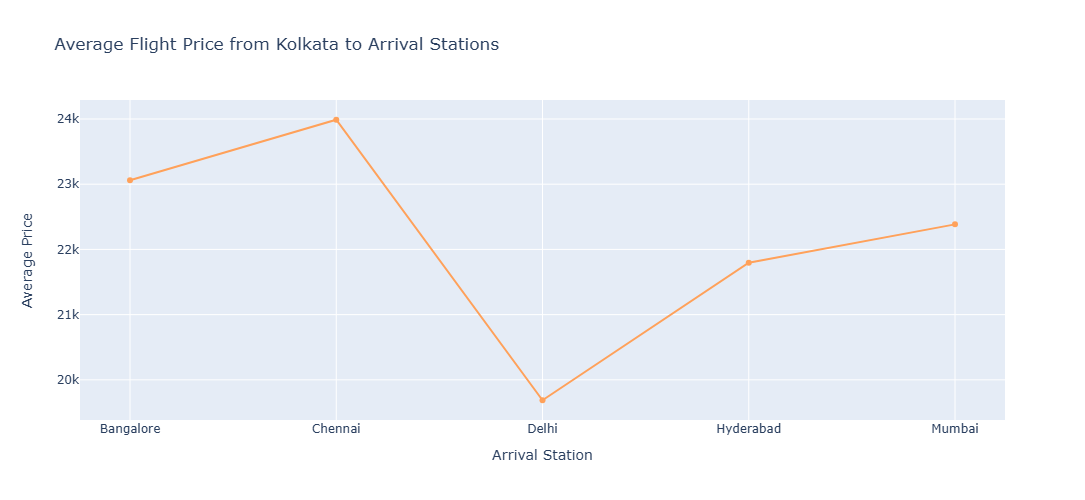

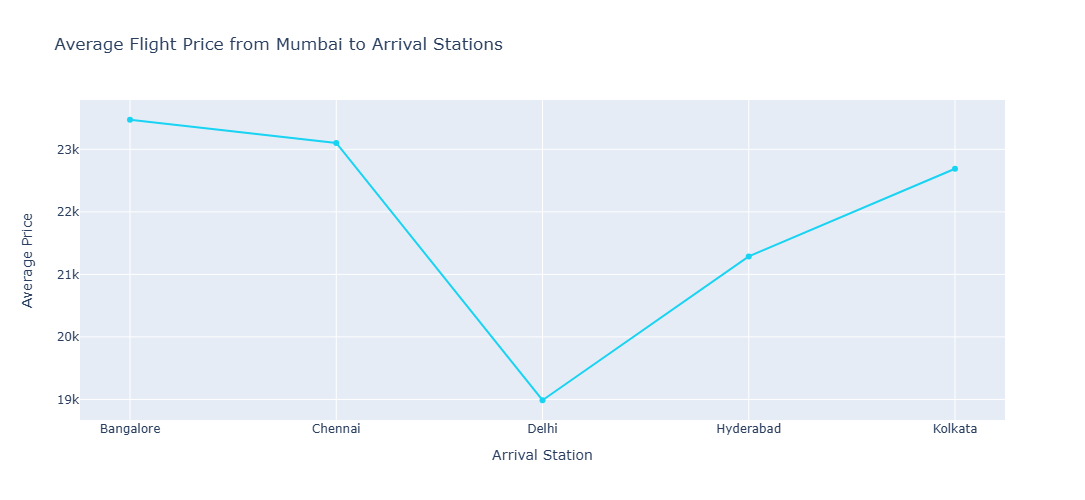

In [72]:
average_price = data.groupby(['from', 'to'])['price'].mean().reset_index()

departure_stations = average_price['from'].unique()

color_palette = px.colors.qualitative.Plotly  

for i, departure in enumerate(departure_stations):
    filtered_data = average_price[average_price['from'] == departure]

    fig = px.line(filtered_data, 
                  x='to', 
                  y='price', 
                  color_discrete_sequence=[color_palette[i % len(color_palette)]],
                  title=f'Average Flight Price from {departure} to Arrival Stations',
                  labels={'to': 'Arrival Station', 'price': 'Average Price'},
                  markers=True)

    fig.update_layout(xaxis_title='Arrival Station', 
                      yaxis_title='Average Price',
                      height=500, width=750)

    fig.show()


# Checking unique values

In [ ]:
for i in data.columns:
    print({i:data[i].unique()})

In [ ]:
data.stops.value_counts()

In [ ]:
data.columns

In [ ]:
data.duration.max()

In [ ]:
data.duration.min()

In [ ]:
#data.duration.value_counts().tolist()

In [73]:
# Provided durations
durations = [
    '02h 10m', '02h 20m', '02h 15m', '02h 05m', '12h 15m', '16h 20m',
    '11h 45m', '14h 30m', '15h 40m', '03h 45m', '02h 30m', '05h 50m',
    '08h 00m', '06h 00m', '14h 40m', '16h 10m', '18h 00m', '23h 10m',
    '24h 10m', '08h 50m', '04h 30m', '15h 15m', '11h 00m', '19h 05m',
    '22h 50m', '26h 25m', '17h 45m', '19h 35m', '26h 40m', '15h 10m',
    '20h 50m', '11h 25m', '22h 15m', '26h 00m', '21h 45m', '03h 50m',
    '04h 25m', '07h 40m', '08h 20m', '10h 25m', '23h 45m', '19h 30m',
    '06h 30m', '12h 25m', '21h 05m', '28h 10m', '28h 15m', '09h 15m',
    '17h 55m', '07h 05m', '13h 50m', '07h 35m', '15h 50m', '24h 25m',
    '04h 10m', '04h 15m', '05h 05m', '29h 20m', '17h 00m', '27h 10m',
    '24h 45m', '05h 45m', '12h 45m', '13h 45m', '17h 50m', '05h 30m',
    '23h 50m', '05h 00m', '26h 30m', '12h 50m', '08h 55m', '11h 10m',
    '12h 10m', '15h 35m', '15h 45m', '07h 55m', '13h 15m', '16h 00m',
    '22h 45m', '06h 20m', '07h 15m', '30h 05m', '18h 15m', '06h 05m',
    '02h 00m', '12h 20m', '03h 30m', '10h 15m', '14h 10m', '25h 35m',
    '04h 05m', '09h 45m', '06h 40m', '09h 40m', '10h 05m', '12h 35m',
    '07h 00m', '08h 15m', '15h 30m', '10h 10m', '23h 30m', '25h 45m',
    '11h 30m', '21h 25m', '14h 15m', '07h 45m', '05h 20m', '05h 40m',
    '04h 45m', '19h 20m', '06h 15m', '10h 20m', '09h 05m', '15h 25m',
    '04h 50m', '25h 50m', '07h 30m', '27h 35m', '28h 25m', '06h 25m',
    '24h 35m', '16h 30m', '11h 20m', '24h 50m', '14h 55m', '26h 05m',
    '05h 25m', '28h 30m', '27h 20m', '08h 40m', '20h 25m', '20h 05m',
    '05h 55m', '20h 35m', '26h 10m', '17h 30m', '18h 20m', '21h 50m',
    '26h 50m', '13h 25m', '19h 15m', '23h 35m', '23h 55m', '12h 05m',
    '14h 25m', '25h 55m', '18h 35m', '13h 05m', '04h 35m', '21h 35m',
    '10h 30m', '11h 40m', '08h 35m', '24h 40m', '14h 45m', '17h 10m',
    '07h 20m', '09h 10m', '11h 35m', '23h 05m', '25h 15m', '21h 15m',
    '08h 25m', '10h 55m', '14h 00m', '04h 55m', '25h 05m', '12h 40m',
    '28h 05m', '21h 20m', '14h 20m', '14h 50m', '15h 20m', '15h 55m',
    '09h 30m', '27h 45m', '24h 55m', '22h 35m', '06h 35m', '09h 20m',
    '13h 00m', '13h 35m', '11h 05m', '05h 35m', '15h 00m', '06h 45m',
    '09h 50m', '11h 15m', '11h 50m', '09h 35m', '08h 30m', '14h 05m',
    '10h 35m', '22h 10m', '22h 05m', '08h 45m', '15h 05m', '25h 30m',
    '16h 25m', '18h 55m', '02h 25m', '03h 55m', '24h 30m', '23h 00m',
    '10h 00m', '19h 00m', '16h 35m', '07h 50m', '03h 10m', '16h 15m',
    '24h 05m', '04h 40m', '06h 55m', '13h 40m', '25h 00m', '08h 05m',
    '17h 05m', '07h 25m', '22h 30m', '12h 55m', '06h 10m', '23h 40m',
    '05h 10m', '13h 20m', '17h 15m', '25h 25m', '29h 10m', '09h 00m',
    '09h 25m', '08h 10m', '26h 35m', '22h 20m', '12h 30m', '21h 00m',
    '24h 15m', '27h 30m', '18h 10m', '16h 40m', '02h 50m', '02h 45m',
    '02h 55m', '03h 00m', '07h 10m', '25h 40m', '02h 40m', '10h 50m',
    '18h 30m', '21h 10m', '23h 20m', '24h 00m', '17h 20m', '27h 25m',
    '26h 15m', '04h 20m', '09h 55m', '19h 40m', '26h 20m', '16h 55m',
    '25h 20m', '27h 15m', '27h 55m', '27h 00m', '12h 00m', '10h 40m',
    '28h 00m', '21h 40m', '21h 55m', '13h 55m', '13h 30m', '02h 35m',
    '22h 25m', '24h 20m', '18h 05m', '29h 35m', '29h 40m', '31h 15m',
    '33h 10m', '36h 55m', '20h 15m', '22h 55m', '06h 50m', '05h 15m',
    '20h 40m'
]

# Function to convert 'hh mm' to total minutes
def convert_to_minutes(duration):
    hours, minutes = map(int, duration[:-1].split('h '))
    return hours * 60 + minutes

# Convert all durations to minutes
total_minutes = [convert_to_minutes(d) for d in durations]

# Create a DataFrame for analysis
df = pd.DataFrame(total_minutes, columns=['Duration (minutes)'])

# Analyze the data
average_duration = df['Duration (minutes)'].mean()
min_duration = df['Duration (minutes)'].min()
max_duration = df['Duration (minutes)'].max()
median_duration = df['Duration (minutes)'].median()

# Display the results
average_duration, min_duration, max_duration, median_duration


(919.8939929328621, 120, 2215, 880.0)

In [ ]:
# data.to_excel(r'go_ibibo eda.xlsx',index=True)

The dataset contains 300,261 flight records with columns such as flight date, airline, flight number, class, departure and arrival cities, times, duration, price, and number of stops.
After cleaning the data by removing columns Unnamed: 11 and Unnamed: 12, and formatting the price column.
Flight dates range from June 26, 2023, to August 13, 2023, with prices spanning from ₹1,116 to ₹124,917 and a mean price of ₹21,174.
Missing and Duplicate Records: Additionally, 2 duplicate rows were identified. Vistara has the highest number of flights at 127,859, followed by Air India with 80,892, and Indigo with 43,120.
Average ticket prices vary significantly among airlines, with Vistara having the highest average price at 30,831.96, while Trujet has the lowest at 3,277.10.
Economy class is the most popular, accounting for 206,772 flights, while business class has 93,487 flights.
Average ticket prices reflect this, with economy tickets averaging 6,636.90, compared to 53,328.19 for business class.
From: Delhi (61,343), Mumbai (60,903), and Bangalore (52,106) are the top departure cities.
To: Mumbai (59,107), Delhi (57,361), and Bangalore (51,112) are the top arrival cities.
Flights with 1 stop are most common (250,927), with non-stop flights at 36,044, and 2+ stops at 13,288.
Non-stop flights are generally cheaper, averaging 9,493.46, compared to 23,217.35 for 1-stop and 14,281.73 for 2+ stops.
From: Flights departing from Chennai average the highest price at 22,302.95, while those from Delhi are slightly lower at 19,213.56.
To: Arrivals to Kolkata average 22,263.37, whereas flights to Delhi are the least expensive at 18,690.93.**